# principal component analysis
right now the number of columns is more than double the size of the rows of the dataframe, also, the matrix is extremely sparse, thus, dimensionality reduction is a good step before any further analysis.

In [1]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D

# model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter

## data

In [2]:
df = pd.read_csv('../data/feature_engineering/combined_feng.csv', index_col=0)
df.shape

(3000, 7353)

In [3]:
# get data
X = df.drop(columns='female_led')
y = df['female_led']

### data preprocessing

In [4]:
scaling=StandardScaler()
scaling.fit(X)
X_scaled = scaling.transform(X)

## plot evaluation

### plotting principal components

In [5]:
# 2d
def scatter(X, n1=0, n2=1, c_col='female_led'):
    plt.scatter(X[:,n1], X[:,n2], c=df[c_col])
    plt.xlabel(f'pc{n1}')
    plt.ylabel(f'pc{n2}')

In [6]:
# 3d
def cube(X, n0=0, n1=1, n2=2, c_col='female_led'):
    fig = plt.figure(figsize=(6,6))
    
    # choose projection 3d for creating a 3d graph
    axis = fig.add_subplot(111, projection='3d')
    
    axis.scatter(X[:,n0], X[:,n1], X[:,n2], c=df[c_col])
    axis.set_xlabel(f"pc{n1}", fontsize=10)
    axis.set_ylabel(f"pc{n1}", fontsize=10)
    axis.set_zlabel(f"pc{n2}", fontsize=10)

### plotting explained variance

In [5]:
def bar(pca, n, line=False):
    
    # individual bar plot
    plt.bar(range(1,n+1), pca.explained_variance_ratio_)
    plt.ylabel('Explained Variance (%)')
    plt.xlabel('Components')
    
    # cumulative line plot
    if line==True:
        plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
             np.cumsum(pca.explained_variance_ratio_),
             c='red', label="Cumulative Explained Variance")
        plt.legend(loc='upper left')
        plt.ylabel('Cumulative Explained Variance (%)')

### plotting correlation between principal components and variables

In [8]:
def heatmap(pca, n=20, n1=0, n2=50):
    '''
    n: number of principal components (first n)
    n1: number of variables (starting index)
    n2: number of variables (ending index)
    '''
    
    # set layout
#     sns.set(rc={'figure.figsize':(20,20)})
#     sns.set(font_scale=2)
    
    # plot
    ax = sns.heatmap(pca.components_[:n,n1:n2],
                     cmap='YlGnBu', cbar=False,
                     yticklabels=np.arange(1,n+1),
                     xticklabels=list(X.columns[n1:n2]))
    ax.set_aspect("equal")

In [9]:
def biplot(X_pca, coeff, labels=None):
    xs = X_pca[:,0]
    ys = X_pca[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()-xs.min())
    scaley = 1.0/(ys.max()-ys.min())
    plt.scatter(xs*scalex, ys*scaley, s=5)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel(f"PC1")
    plt.ylabel(f"PC2")

## machine learning

### n=3

In [10]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

In [11]:
X_pca3.shape

(3000, 3)

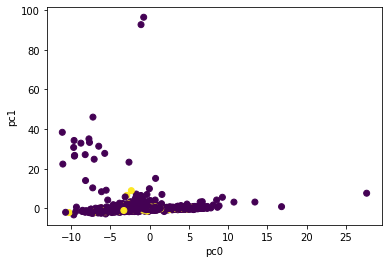

In [12]:
scatter(X_pca3)

In [13]:
# scatter(X_pca3, 0, 2)

In [14]:
# scatter(X_pca3, 1, 2)

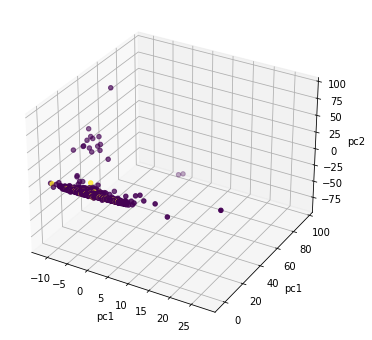

In [15]:
cube(X_pca3)

It seems that 3 components is too little and does not really explain the picture, with the data still very clustered.

### n=3000

default `n_components == min(n_samples, n_features)`

In [7]:
pca = PCA()
X_pca3000 = pca.fit_transform(X_scaled)

In [17]:
X_pca3000.shape

(3000, 3000)

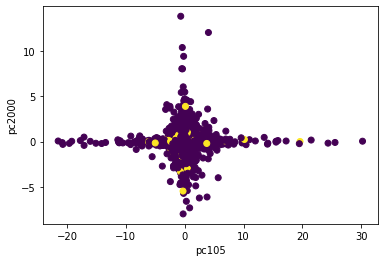

In [18]:
scatter(X_pca3000, 105, 2000)

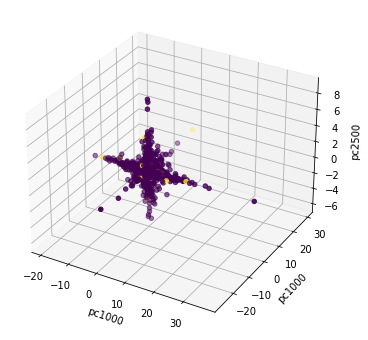

In [19]:
cube(X_pca3000, 100, 1000, 2500)

### deciding on `n`

In [8]:
default_n = 3000

In [23]:
np.linspace(0,0.0015,5), ['0%', '0.05%', '0.10%', '0.15%', '0.20%'],

array([0.    , 0.0005, 0.001 , 0.0015, 0.002 ])

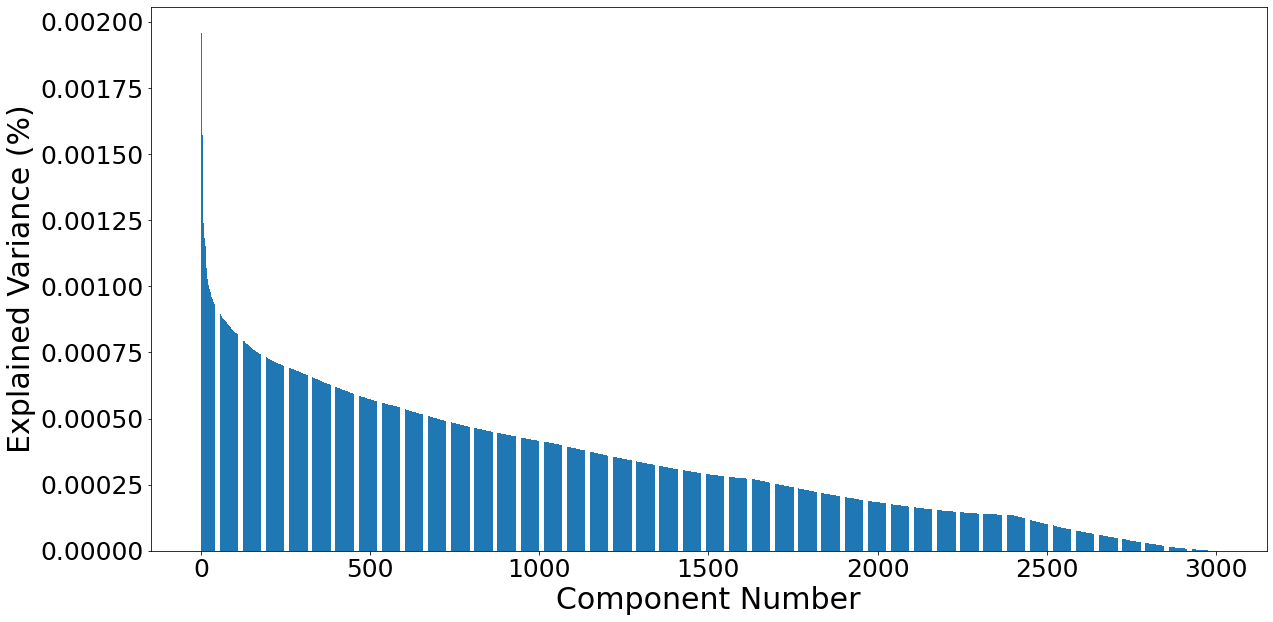

In [34]:
plt.figure(figsize=(20,10))
# bar(pca, 3000);
plt.bar(range(1,default_n+1), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance (%)', fontsize=30)
plt.xlabel('Component Number', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig('pca_bar.png')

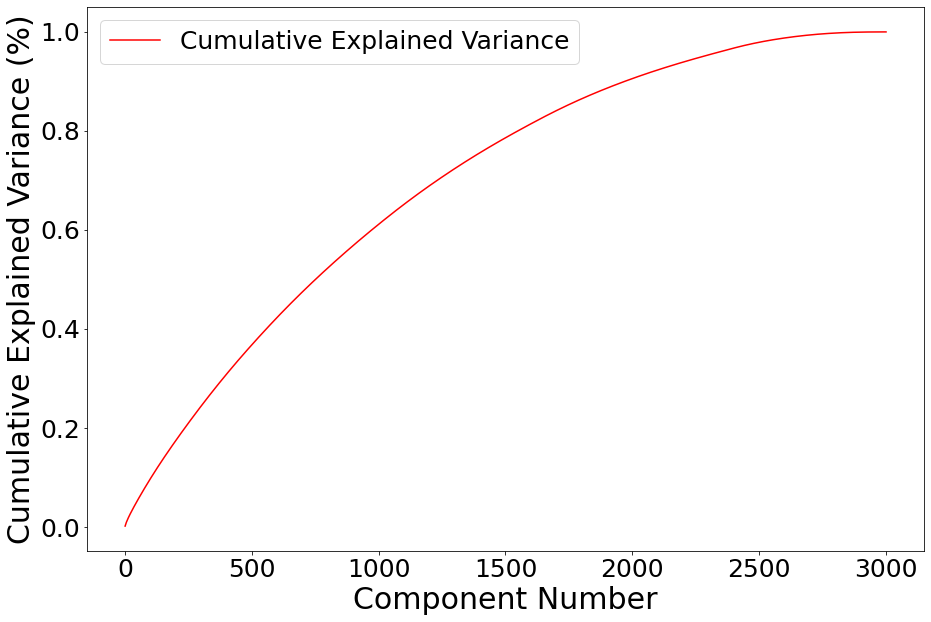

In [21]:
plt.figure(figsize=(15,10))
# bar(pca, 3000, line=True);

plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
             np.cumsum(pca.explained_variance_ratio_),
             c='red', label="Cumulative Explained Variance")

plt.ylabel('Cumulative Explained Variance (%)', fontsize=30)
plt.xlabel('Component Number', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.savefig('pca_line.png')

## Interpretation

### 1. Scree Plot
    
In the first bar chart ("**scree plot**"), we can decide on n (`n_components`) depending on where the "elbow" is (i.e. a point at which the proportion of variance explained by each subsequent principal component drops off). 

### 2. Variance Explained Criteria

Another simple approach to decide on the number of principal components is to set a threshold, and stop when the first k components account for a percentage of total variation greater than this threshold (Jolliffe 2002). 

In our case, around **1000** components explain 60% of the data, and somewhere around 1750 explains 80% of the data.

### n=1000 

In [23]:
pca1000 = PCA(n_components=1000)
X_pca1000 = pca1000.fit_transform(X_scaled)

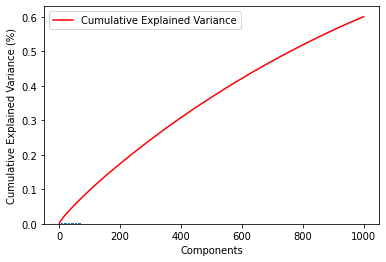

In [24]:
bar(pca1000, 1000, line=True)

### n=1750

In [25]:
pca1750 = PCA(n_components=1750)
X_pca1750 = pca1750.fit_transform(X_scaled)

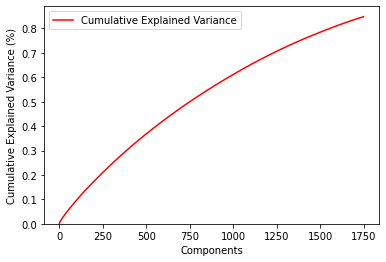

In [26]:
bar(pca1750, 1750, line=True)

### 3. Kaiser-Guttman Rule

The Kaiser’s rule is a widely used method to evaluate the maximum number of linear combinations to extract from the data set. According to that rule, only those principal components whose variances exceed 1 are retained (Jolliffe 2002).

The explained variances are "eigenvalues".  The eigenvalues are sum of squares of the distance between the projected data points and the origin along an eigenvector associated with a principal component.

In [27]:
Counter(pca1000.explained_variance_>1)

Counter({True: 1000})

In [28]:
Counter(pca1750.explained_variance_>1)

Counter({True: 1750})

In [29]:
Counter(pca.explained_variance_>1)

Counter({True: 2391, False: 609})

All 1000 eigenvalues are greater than 1. All 1750 eigenvalues are also greater than 1. When checking all 3000 components, we see that 2391 of them are actually all relatively valuable information.

## Decision
Combining information from the scree plot, cumulative explained variance line plot, and the Kaiser's rule, we should keep 1750 components, keeping 80% of the data.

## Interpreting principal components
### Heatmap

In [30]:
# sns.set(rc={'figure.figsize':(600,200)})
# ax = sns.heatmap(pca1000.components_,
#                  cmap='YlGnBu',
#                  yticklabels=[ "PCA"+str(x) for x in range(1, pca1000.n_components_+1)],
#                  xticklabels=list(X.columns),
#                  cbar_kws={"orientation": "horizontal"})
# ax.set_aspect("equal")

# fig = ax.get_figure()
# fig.savefig('heatmap1000.png')

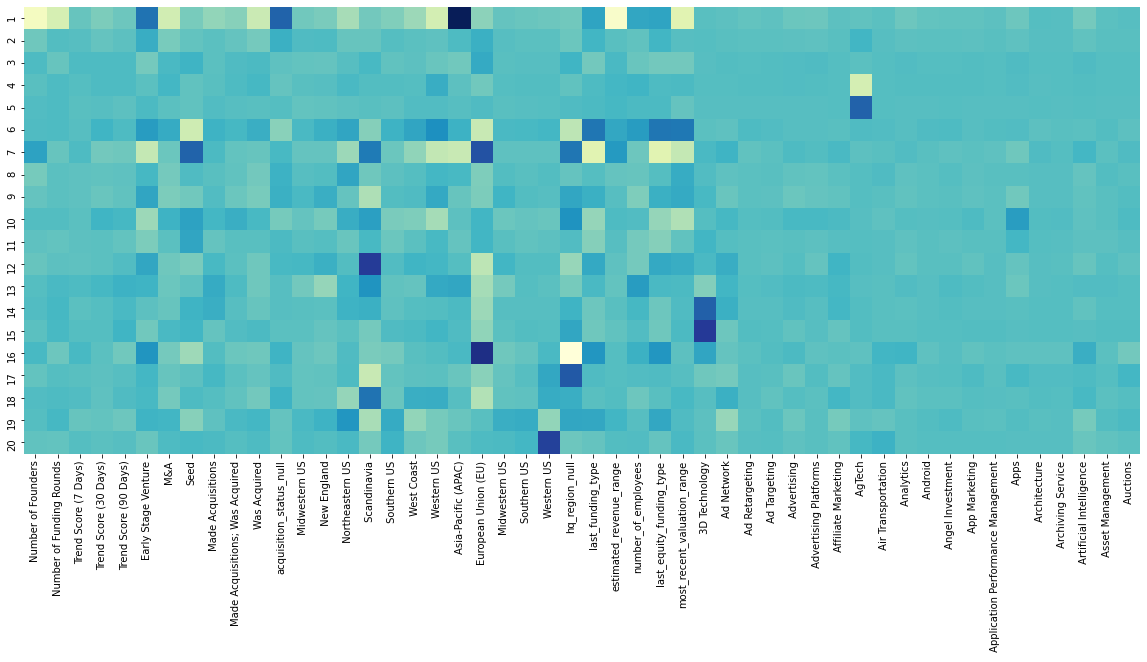

In [31]:
##### sns.set(rc={'figure.figsize':(20,20)})
plt.figure(figsize=(20,15))
# sns.set(font_scale=1)
heatmap(pca1000, n=20, n2=50)
plt.savefig('heatmap50.png')

write a loop to go through all columns and see its relation with the first 20 of the 1750 components and save those plots

In [32]:
# for i in np.arange(0,7353,50)[:-1]:
#     plt.figure(figsize=(20,15))
#     heatmap(pca1000, n=20, n1=i, n2=i+50)
#     plt.savefig(f'heatmaps/heatmap{i}-{i+50}.png')

In [33]:
# index to remove the last one so that index does not go out of range, 
# can plot the last three variables separately

Instead of plotting all 1750 principal components and all 7353 variables into some thousands of heatmaps, a more systematic way may be to get all the information with absolute correlation greater than a certain threshold.

create a dataframe of correlation between variables and principal components and set corr>1 or corr<-1 and print out the ocrrelation value, the number of pc, and the variable name

In [34]:
# dataframe of explained variance between each pc and features
var_df = pd.DataFrame(pca.components_)

According to the color bar in the heatmap, the max and min scale annotated are around 0.20 to -0.15, so I thought setting the threshold of the absolute value to 0.15 could be appropriate.

In [35]:
threshold=0.15

In [36]:
high_var = []
for row in range(var_df.shape[0]): #pc
    for col in range(var_df.shape[1]): #var
        if abs(var_df[col].iloc[row]) > threshold:
            high_var.append([row, col, X.columns[col],
                             var_df[col].iloc[row], abs(var_df[col].iloc[row])])

In [37]:
high_var_df = pd.DataFrame(high_var)

In [38]:
# high_var_df

In [39]:
high_var_df.rename(columns={0: 'principal_component', 1: 'variable', 2: 'variable_name', 
                            3: 'variance', 4: 'variance_abs'}, inplace=True)

In [40]:
# high_var_df

then get variance in absolute values, look at top 100 values and what variables it corresponds to, **then when fitting back into xgboost model, get the original columns that are selected as top variables in pca instead of fitting in the pc into the model**.

_also try out xgboost native feature importance algorithm_

In [41]:
high_var_df.sort_values('variance_abs', ascending=False)[:100]

,principal_component,variable,variable_name,variance,variance_abs
2127,2389,6707,Qianfan Capital,0.560970,0.560970
2129,2389,6817,Shanghai Zuyuan Investment Management,-0.554401,0.554401
2104,2386,6631,Orient Shiqi Fund,0.540125,0.540125
2124,2388,7132,Zhongjun Capital,0.462727,0.462727
2120,2388,6663,Perfect Investment Group,-0.456528,0.456528
...,...,...,...,...,...
2249,2497,872,Real Time,0.285950,0.285950
1316,2143,5729,Amr Zedan,0.285933,0.285933
2136,2390,7111,Yueyin Venture Capital,-0.285401,0.285401
811,1491,991,Gyor,0.282714,0.282714


In [42]:
high_var_df.sort_values('variance_abs', ascending=False)['variable'].shape

(2946,)

In [43]:
high_var_df.sort_values('variance_abs', ascending=False)['variable'].unique().shape

(1352,)

In [44]:
high_var_org_col_index100 = list(
    high_var_df.sort_values('variance_abs', ascending=False)['variable'].unique()[:100])

In [45]:
high_var_org_col_index = list(
    high_var_df.sort_values('variance_abs', ascending=False)['variable'].unique())

In [46]:
with open('high_var_org_col_index.txt', 'w') as writer:
    writer.write(str(high_var_org_col_index))

In [47]:
with open('high_var_org_col_index100.txt', 'w') as writer:
    writer.write(str(high_var_org_col_index100))

In [48]:
# X.columns[high_var_org_col_index]

### understanding each principal components

### PCA Biplot
Biplot contains two plots:

1. PCA scatter plot which shows first two component ( We already plotted this above)
2. PCA loading plot which shows how strongly each characteristic influences a principal component.

**PCA Loading Plot**: All vectors start at origin and their projected values on components explains how much weight they have on that component. Also , angles between individual vectors tells about correlation between them.

In [49]:
# plt.figure(figsize=(600,600))
# biplot(X_pca1000[:,0:2], np.transpose(pca1000.components_[0:2, :]), list(X.columns))
# plt.savefig('biplot1000.png')

In [50]:
# def biplot(X_pca, coeff, labels=None):
#     xs = X_pca[:,0]
#     ys = X_pca[:,1]
#     n = coeff.shape[0]
#     scalex = 1.0/(xs.max()-xs.min())
#     scaley = 1.0/(ys.max()-ys.min())
#     plt.scatter(xs*scalex, ys*scaley, s=5)
    
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
#     plt.xlabel(f"PC1")
#     plt.ylabel(f"PC2")